In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from time import time

In [3]:
train_data = pd.read_csv('./data/train.csv')
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
train_data.drop_duplicates(inplace=True)
data = train_data.drop(columns=['id'])
data.shape

(159571, 7)

In [5]:
tf = TfidfVectorizer(analyzer='word',lowercase=True, min_df = 2,max_df = 0.9,
                     strip_accents='unicode', sublinear_tf=1)

X =  tf.fit_transform(data["comment_text"])

In [6]:
def train_model(classifier, X, y, size_of_test = 0.20, seed = 2):
    
    # Split Train Dataset into Train-Test and Train the Classifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size_of_test,
                                                        random_state = seed)
    
    print('-------------------------------------------------------')
    print('Number of examples in our data is', X.shape[0])
    print('Number of examples in Training data is', X_train.shape[0])
    print('Number of examples in Testing data is', X_test.shape[0])
    print('-------------------------------------------------------')
    
    t0 = time()    
    print('Classifier used:', classifier.__class__.__name__)
    
    #Train the Classifier
    classifier.fit(X_train,y_train)
    print("Classifier training completed in %0.3fs" % (time() - t0))
    
    # Generate Predictions
    y_pred = classifier.predict(X_test)
    
    #Checking for the Accuracy
    print("Accuracy: %0.3f %%" % (accuracy_score(y_test,y_pred) * 100.0))

In [7]:
def train_model_with_cv(classifier, X, y, k = 5, size_of_test = 0.20, seed = 2):
    
    t0 = time()
    print('-------------------------------------------------------')
    print('Classifier used: ', classifier.__class__.__name__)    
    cv_scores = cross_val_score(classifier, X, y, cv=k, scoring="accuracy")    
    print("Classifier training completed in %0.3fs" % (time() - t0))
    print('The number of folds used: ', k)    
    print("Mean Accuracy: %0.3f %%" % (np.round(np.mean(cv_scores),3) * 100.0))

In [8]:
data.columns

Index(['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [9]:
classes_list = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult','identity_hate']

In [10]:
k = [5,10] # For K-fold

In [11]:
mnb_clf = MultinomialNB()
lr_clf = LogisticRegression()

In [12]:
clf_list = [mnb_clf, lr_clf]

#### Binary Classification of each class

In [13]:
for label in classes_list:
    y = data[label]
    print('-------------------------------------------------------')
    print('-------------------------------------------------------')
    print('The target label is', label)
    train_model(mnb_clf,X,y)

-------------------------------------------------------
-------------------------------------------------------
The target label is toxic
-------------------------------------------------------
Number of examples in our data is 159571
Number of examples in Training data is 127656
Number of examples in Testing data is 31915
-------------------------------------------------------
Classifier used: MultinomialNB
Classifier training completed in 0.045s
Accuracy: 92.837 %
-------------------------------------------------------
-------------------------------------------------------
The target label is severe_toxic
-------------------------------------------------------
Number of examples in our data is 159571
Number of examples in Training data is 127656
Number of examples in Testing data is 31915
-------------------------------------------------------
Classifier used: MultinomialNB
Classifier training completed in 0.051s
Accuracy: 98.919 %
---------------------------------------------------

In [14]:
for label in classes_list:
    y = data[label]
    print('-------------------------------------------------------')
    print('-------------------------------------------------------')
    print('The target label is', label)
    train_model(lr_clf,X,y)

-------------------------------------------------------
-------------------------------------------------------
The target label is toxic
-------------------------------------------------------
Number of examples in our data is 159571
Number of examples in Training data is 127656
Number of examples in Testing data is 31915
-------------------------------------------------------
Classifier used: LogisticRegression
Classifier training completed in 1.656s
Accuracy: 95.588 %
-------------------------------------------------------
-------------------------------------------------------
The target label is severe_toxic
-------------------------------------------------------
Number of examples in our data is 159571
Number of examples in Training data is 127656
Number of examples in Testing data is 31915
-------------------------------------------------------
Classifier used: LogisticRegression
Classifier training completed in 1.319s
Accuracy: 98.975 %
-----------------------------------------

#### Code used to combine toxic and severe_toxic columns into single column named toxic (Commented)

In [15]:
#l = []
#count = 0
#N = data.shape[0]

#for i in range(N):
#    if(data.toxic[i] == 1 or data.severe_toxic[i] == 1):
#        count += 1
#        l.append(i)
#print(count)        

In [16]:
#data['final_toxic'] = 0
#for i in l:
#    data.final_toxic[i] = 1

In [17]:
#data.drop(columns=['toxic','severe_toxic'], inplace=True)
#data.shape

In [18]:
#data.head(10)

#### Code to convert six features into a single feature (Commented)

In [19]:
#data['label'] = 'NON-TOXIC'

#for i in range(N):
#    print(N - i)
#    iter_label = 'NON-TOXIC'
    
#    if(data.final_toxic[i] == 1):
#        iter_label = 'TOXIC'
#    elif(data.obscene[i] == 1):
#        iter_label = 'OBSCENE'
#    elif(data.threat[i] == 1):
#        iter_label = 'THREAT'
#    elif(data.insult[i] == 1):
#        iter_label = 'INSULT'    
#    elif(data.identity_hate[i] == 1):
#        iter_label = 'HATE'
        
#    data.label[i] = iter_label    

In [20]:
# final_data.to_csv('final_data.csv')

In [21]:
# This function is written to handle the class imbalance
def get_data(row_count = 16225, multiplier = 1.5):
    final_data = pd.read_csv('./data/final_data.csv')
    print('Total rows in the dataset:', final_data.shape[0])
    final_data.drop(columns=['Unnamed: 0'], inplace= True)
    final_data["label_idx"] = final_data.label.map({'NON-TOXIC':0,'HATE':1,'INSULT':2,
                                                'OBSCENE':3,'THREAT':4,'TOXIC':5})
    nt_data = final_data[final_data.label_idx == 0]
    toxic_data = final_data[final_data.label_idx != 0]
    
    non_toxic_data = nt_data.sample(round(row_count * multiplier))
    train_data = pd.concat([non_toxic_data, toxic_data], axis=0)
    
    return train_data

In [22]:
train_df = get_data(multiplier=1)
train_df.shape

Total rows in the dataset: 159571


(32450, 3)

In [23]:
train_df.groupby('label_idx').count()

,comment_text,label
label_idx,,
0,16225,16225
1,54,54
2,329,329
3,523,523
4,25,25
5,15294,15294


In [28]:
clf_list = [mnb_clf, lr_clf]
X =  tf.fit_transform(train_df["comment_text"])
y = train_df.label_idx

for clf in clf_list:
    train_model(clf,X,y,size_of_test=0.3)

-------------------------------------------------------
Number of examples in our data is 32450
Number of examples in Training data is 22715
Number of examples in Testing data is 9735
-------------------------------------------------------
Classifier used: MultinomialNB
Classifier training completed in 0.015s
Accuracy: 86.328 %
-------------------------------------------------------
Number of examples in our data is 32450
Number of examples in Training data is 22715
Number of examples in Testing data is 9735
-------------------------------------------------------
Classifier used: LogisticRegression
Classifier training completed in 0.853s
Accuracy: 87.458 %


In [29]:
for clf in clf_list:
    train_model_with_cv(clf,X,y,5,size_of_test=0.3)

-------------------------------------------------------
Classifier used:  MultinomialNB
Classifier training completed in 0.137s
The number of folds used:  5
Mean Accuracy: 86.100 %
-------------------------------------------------------
Classifier used:  LogisticRegression
Classifier training completed in 4.187s
The number of folds used:  5
Mean Accuracy: 87.100 %


In [30]:
for clf in clf_list:
    train_model_with_cv(clf,X,y,10)

-------------------------------------------------------
Classifier used:  MultinomialNB
Classifier training completed in 0.265s
The number of folds used:  10
Mean Accuracy: 86.300 %
-------------------------------------------------------
Classifier used:  LogisticRegression
Classifier training completed in 10.356s
The number of folds used:  10
Mean Accuracy: 87.300 %


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [32]:
rf_clf = RandomForestClassifier()
svm_clf = SVC()
sgd_clf = SGDClassifier(penalty='l2',max_iter=100, tol=None)
xgb_clf = XGBClassifier()

In [33]:
clf_list = [rf_clf, svm_clf, sgd_clf, xgb_clf]

In [34]:
for clf in clf_list:
    train_model(clf,X,y)

-------------------------------------------------------
Number of examples in our data is 32450
Number of examples in Training data is 25960
Number of examples in Testing data is 6490
-------------------------------------------------------
Classifier used: RandomForestClassifier
Classifier training completed in 5.665s
Accuracy: 78.798 %
-------------------------------------------------------
Number of examples in our data is 32450
Number of examples in Training data is 25960
Number of examples in Testing data is 6490
-------------------------------------------------------
Classifier used: SVC
Classifier training completed in 177.505s
Accuracy: 51.063 %
-------------------------------------------------------
Number of examples in our data is 32450
Number of examples in Training data is 25960
Number of examples in Testing data is 6490
-------------------------------------------------------
Classifier used: SGDClassifier
Classifier training completed in 3.193s
Accuracy: 88.136 %
---------

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [40]:
for k in [5,10]:
    train_model_with_cv(sgd_clf, X, y, k)

-------------------------------------------------------
Classifier used:  SGDClassifier
Classifier training completed in 13.316s
The number of folds used:  5
Mean Accuracy: 87.800 %
-------------------------------------------------------
Classifier used:  SGDClassifier
Classifier training completed in 28.666s
The number of folds used:  10
Mean Accuracy: 87.700 %


#### Best Classifier for Confusion Matrix

In [42]:
# Split Train Dataset into Train-Test and Train the Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 2)

print('-------------------------------------------------------')
print('Number of examples in our data is', X.shape[0])
print('Number of examples in Training data is', X_train.shape[0])
print('Number of examples in Testing data is', X_test.shape[0])
print('-------------------------------------------------------')

t0 = time()    
print('Classifier used:', sgd_clf.__class__.__name__)

#Train the Classifier
sgd_clf.fit(X_train,y_train)
print("Classifier training completed in %0.3fs" % (time() - t0))

# Generate Predictions
y_pred = sgd_clf.predict(X_test)

-------------------------------------------------------
Number of examples in our data is 32450
Number of examples in Training data is 25960
Number of examples in Testing data is 6490
-------------------------------------------------------
Classifier used: SGDClassifier
Classifier training completed in 3.230s


#### Confusion Matrix

In [59]:
# Main idea - https://bit.ly/2DCTGd5
import matplotlib.pyplot as plt
%matplotlib inline

def get_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
Normalized confusion matrix


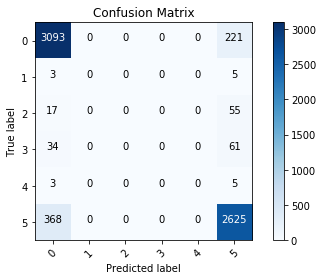

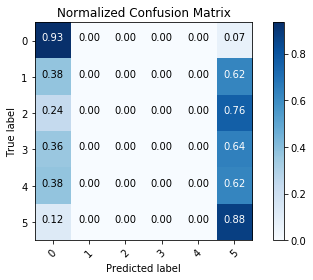

In [61]:
from time import time
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
class_names = [0,1,2,3,4,5]

# Plot Confusion matrix
plt.figure()
get_confusion_matrix(cnf_matrix, classes= class_names,
                      title='Confusion Matrix')

# Plot Normalized Confusion matrix
plt.figure()
get_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix')

plt.show()